In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [141]:
#python kodu buraya
titanic.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [142]:
mean_encode = titanic.groupby("Sex")["Survived"].mean()
mean_encode

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [143]:
titanic.loc[:, "sex_mean_encode"] = titanic["Sex"].map(mean_encode)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_mean_encode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.188908
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.742038
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.742038
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.742038
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.188908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.188908
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.742038
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.742038
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.188908


Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [144]:
#python kodu buraya
from sklearn.preprocessing import OneHotEncoder
ohc= OneHotEncoder()
titanic.Embarked.fillna(titanic.Embarked.mode()[0], inplace=True)
ohe = ohc.fit_transform(titanic.Embarked.values.reshape(-1,1)).toarray()
titanicOneHot = pd.DataFrame(ohe, columns = ["Emb_"+str(ohc.categories_[0][i])
                                       for i in range(len(ohc.categories_[0]))])

dft = pd.concat([titanic, titanicOneHot], axis=1)
dft

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_mean_encode,Emb_C,Emb_Q,Emb_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.188908,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.742038,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.742038,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.742038,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.188908,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.188908,0.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.742038,0.0,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.742038,0.0,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.188908,1.0,0.0,0.0


Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [145]:
#python kodu buraya
from sklearn.preprocessing import LabelEncoder
titanic["Cabin"] = titanic["Cabin"].astype(str)
titanic["Cabin_label_encoded"] = LabelEncoder().fit_transform(titanic.Cabin)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_mean_encode,Cabin_label_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,nan,S,0.188908,147
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.742038,81
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,0.742038,147
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.742038,55
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,nan,S,0.188908,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,nan,S,0.188908,147
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.742038,30
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,nan,S,0.742038,147
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.188908,60


# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

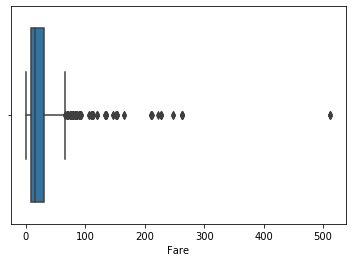

In [146]:
#python kodu buraya
sns.boxplot(titanic.Fare)

Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [147]:
#python kodu buraya
titanic["Fare"] - titanic["Fare"].mean()

0     -24.954208
1      39.079092
2     -24.279208
3      20.895792
4     -24.154208
         ...    
886   -19.204208
887    -2.204208
888    -8.754208
889    -2.204208
890   -24.454208
Name: Fare, Length: 891, dtype: float64

In [148]:
z_score = (titanic["Fare"] - titanic["Fare"].mean() ) / titanic["Fare"].std()

In [149]:
(z_score>3).sum(), (z_score<-3).sum()

(20, 0)

In [150]:
(z_score>3) | (z_score<-3)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [151]:
#python kodu buraya
titanic[z_score<=3]["Fare"].max()

164.8667

In [152]:
titanic[z_score>=-3]["Fare"].min()

0.0

In [153]:
upper_replace_value = titanic[z_score<=3]["Fare"].max()
lower_replace_value = titanic[z_score>=-3]["Fare"].min()

In [154]:
lower_replace_value, upper_replace_value

(0.0, 164.8667)

In [155]:
titanic_zscore_replaced = titanic.copy()
titanic_zscore_replaced["Fare"][z_score>3] = upper_replace_value
titanic_zscore_replaced["Fare"][z_score<-3] = lower_replace_value

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [156]:
titanic["Fare"].min(), titanic["Fare"].max()

(0.0, 512.3292)

In [157]:
titanic_zscore_replaced["Fare"].min(), titanic_zscore_replaced["Fare"].max(), titanic_zscore_replaced.shape

(0.0, 164.8667, (891, 14))

Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [158]:
#python kodu buraya
Q1 = titanic["Fare"].quantile(q=0.25)
Q3 = titanic["Fare"].quantile(q=0.75)

In [159]:
IQR = Q3 - Q1
IQR

23.0896

In [160]:
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
lower_limit, upper_limit

(-26.724, 65.6344)

In [161]:
len(titanic.Fare[(titanic.Fare > upper_limit) | (titanic.Fare < lower_limit)])

116

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [95]:
#python kodu buraya
titanic_iqr_replaced = titanic.copy()
titanic_iqr_replaced["Fare"][titanic["Fare"] > upper_limit] = upper_limit
titanic_iqr_replaced["Fare"][titanic["Fare"] < lower_limit] = lower_limit

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [96]:
titanic_iqr_replaced["Fare"].min(),titanic_iqr_replaced["Fare"].max(), titanic_iqr_replaced.shape

(0.0, 512.3292, (891, 14))

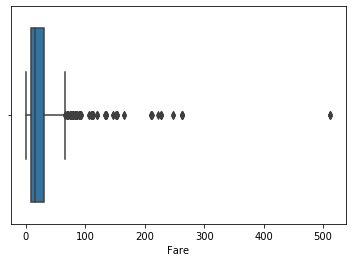

In [108]:
sns.boxplot(titanic_iqr_replaced.Fare)

Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [102]:
#python kodu buraya
lower_limit = titanic_he["Fare"].quantile(q=0.01)
upper_limit = titanic_he["Fare"].quantile(q=0.99)

In [103]:
lower_limit, upper_limit

(0.0, 249.00622000000033)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [105]:
titanic_he_replaced = titanic.copy()
titanic_he_replaced["Fare"][titanic["Fare"] > upper_limit] = upper_limit
titanic_he_replaced["Fare"][titanic["Fare"] < lower_limit] = lower_limit

C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Lenovo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [106]:
titanic_he_replaced["Fare"].min(), titanic_he_replaced["Fare"].max(),titanic_he_replaced.shape

(0.0, 249.00622000000033, (891, 14))

In [109]:
outlier = titanic_he_replaced[(titanic_he_replaced.Fare<lower_limit)|(titanic_he_replaced.Fare>=upper_limit)]
len(outlier)

9

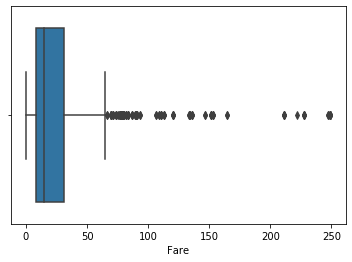

In [107]:
sns.boxplot(titanic_he_replaced.Fare)

Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?